# STAT3006 Assignment 4 <img src="https://i.kym-cdn.com/photos/images/newsfeed/001/852/165/c6e" height="32" width="32">

**Avatar Putra Pertama Azka - 47286238**

In [2]:
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import StandardScaler

# training utils
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict, GridSearchCV

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# single variable analysis
from scipy.stats import ttest_ind, false_discovery_control

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from time import time

# visualization
from matplotlib import pyplot as plt
import plotly.express as px

import seaborn as sns

# Dataset bizzzz

In [3]:
features: pd.DataFrame = pd.read_csv("data/Aaroe.csv", index_col=0)
labels: pd.DataFrame = pd.read_csv("data/Aaroelabels.csv")

In [4]:
features.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
100002,0.1134,0.0560,-0.2562,0.1638,0.2423,0.6244,0.5118,0.6083,-0.1223,0.3054,...,0.1386,-0.2830,-0.4520,-0.2199,0.3305,0.0104,-0.4842,0.1371,0.5243,-0.7144
100037,0.2036,-0.2881,0.3000,-0.1245,-0.1931,0.6167,0.3156,0.1385,-0.1324,-0.0705,...,-0.0941,-0.1529,-0.2488,-0.0012,0.2233,-0.0586,-0.3079,-0.3399,-0.1787,-0.4291
100058,-0.1888,-0.1852,-0.5350,0.0004,-0.1942,0.5297,-0.0255,0.5359,0.4558,0.4745,...,-0.0046,-0.2142,-0.1024,0.0988,-0.3493,0.3408,-0.0091,-0.0199,-0.0292,-0.5355
100079,0.4796,0.1218,-0.4838,0.0131,0.2402,0.2539,0.4935,0.6921,0.0927,0.4592,...,0.1737,-0.0121,-0.3563,-0.3899,-0.3027,-0.0069,-0.3533,0.0783,0.1998,-0.8642
100100,-0.4458,-0.0933,-0.2071,0.0706,-0.2367,0.1844,0.0015,-0.3982,-0.0905,-0.1620,...,-0.2226,-0.1462,-0.2799,0.1476,-0.0923,0.0413,-0.2852,0.0443,0.1640,-0.3789


In [5]:
labels.head()

,GSM413367,GSM413368,GSM413369,GSM413370,GSM413371,GSM413372,GSM413373,GSM413374,GSM413375,GSM413376,...,GSM413487,GSM413488,GSM413489,GSM413490,GSM413491,GSM413492,GSM413493,GSM413494,GSM413495,GSM413496
0,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer,cancer


In [6]:
print(features.shape)
print(labels.shape)

(11217, 121)
(1, 121)


## Preprocessing

In [7]:
ft = features.T
cols = ft.columns
idx = ft.index

scaler = StandardScaler()
ft_scaled = scaler.fit_transform(ft.to_numpy())

X = pd.DataFrame(ft_scaled, columns=cols, index=idx)
Y = labels.T.rename(columns={0: "label"})

In [8]:
data = X.join(Y['label'])

In [9]:
data.to_csv("data/processed.csv")

In [10]:
data.shape

(121, 11218)

In [11]:
X.isna().any().any()

False

In [12]:
CLASSNAMES = {
    'normal': 0.0,
    'cancer': 1.0
}

# 1. PCA on Gene Expression Dataset

Explained Variance: 1.0000000000000002
# of PCs: 121


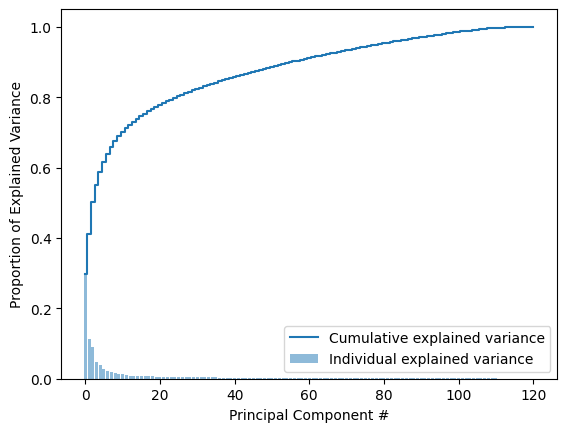

In [13]:
pca = PCA()
x = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")
print(f"# of PCs: {pca.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')

plt.show()

Explained Variance: 0.5879975561515826
# of PCs: 5


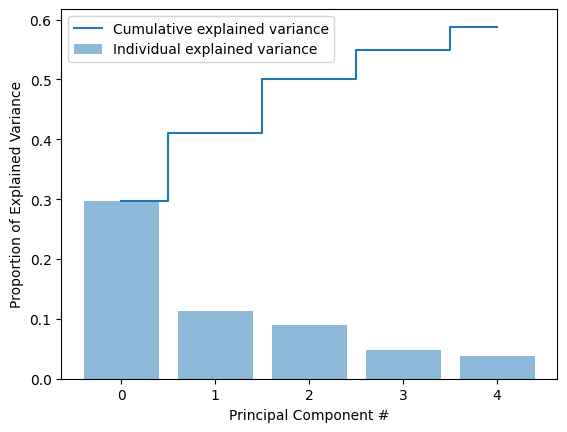

(121, 5)


In [14]:
# oh no duplication anyway
n_components = 5
pca_first_n = PCA(n_components=n_components)
first_n = pca_first_n.fit_transform(X)

explained_variance = pca_first_n.explained_variance_ratio_
cumsum_var = np.cumsum(explained_variance)
print(f"Explained Variance: {sum(pca_first_n.explained_variance_ratio_)}")
print(f"# of PCs: {pca_first_n.n_components_}")

plt.bar(
    range(0,len(explained_variance)),
    explained_variance,
    alpha=0.5,
    align='center',
    label='Individual explained variance'
)

plt.step(
    range(0,len(cumsum_var)),
    cumsum_var,
    where='mid',
    label='Cumulative explained variance'
)

plt.ylabel('Proportion of Explained Variance')
plt.xlabel('Principal Component #')
plt.legend(loc='best')

plt.show()

# TODO: figure out how to identify relevant PCs
labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'label'

print(first_n.shape)

fig = px.scatter_matrix(
    first_n,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=range(n_components),
    labels=labels,
    title=f'First {n_components} PCs, Total Explained Variance: {sum(pca_first_n.explained_variance_ratio_):.2f}%',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

In [15]:
components = pd.DataFrame(pca.components_, columns=X.columns)
components.to_csv('supplementary/PrincipalComponentDirections.csv', index_label="Principal Component")

# 2. Single Variable Analysis

In [16]:
class SVA:
    def __init__(self, data: pd.DataFrame) -> None:
        label = data['label']
        self.n_variables = len(data.columns) - 1 # exclude response variable
        self.normals = data.loc[label == 'normal'].drop('label', axis='columns')
        self.cancers = data.loc[label == 'cancer'].drop('label', axis='columns')
        self.calcPvals()
        self.adjustPvals()
        self.df_unadjusted = pd.Series(self.pvals, index=data.drop('label', axis='columns').columns)
        self.df_adjusted = pd.Series(self.pvals_adjusted, index=data.drop('label', axis='columns').columns)

    def calcPvals(self):
        ttresults = ttest_ind(self.normals, self.cancers, equal_var=False)
        self.pvals = ttresults.pvalue

    def adjustPvals(self):
        # TODO: how does this work?
        self.pvals_adjusted = false_discovery_control(self.pvals, method='bh')

In [17]:
MAX_FDR = 0.1
sva = SVA(data)
# sva.pvals_adjusted[sva.pvals_adjusted < MAX_FDR]
significant_genes = sva.df_unadjusted[sva.df_adjusted < MAX_FDR]
significant_genes.to_csv('supplementary/SignificantGenes.csv', header=False)

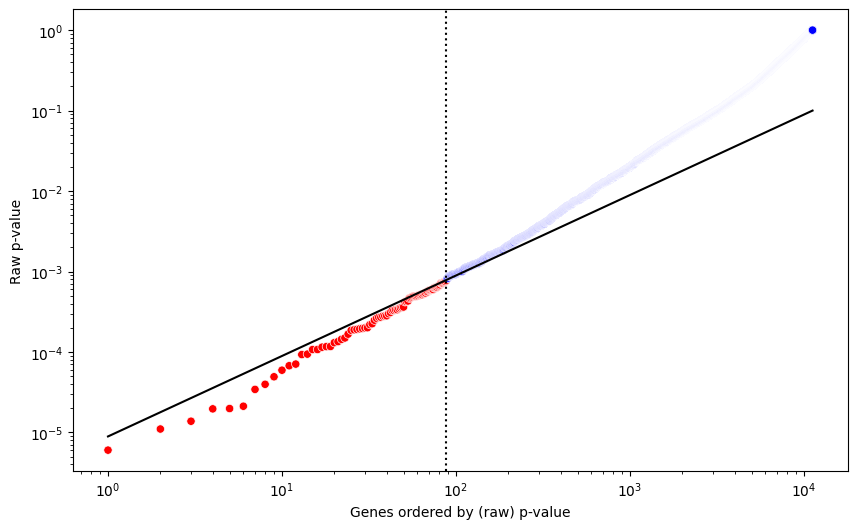

In [18]:
genes = pd.DataFrame({"unadjusted": sva.pvals, "adjusted": sva.pvals_adjusted}, index=X.columns)
genes_sorted = genes.sort_values(by=['unadjusted'])
genes_sorted['significant'] = np.where(genes_sorted['adjusted'] < MAX_FDR, 'red', 'blue')
genes_sorted['rank'] = range(1, len(genes_sorted) + 1)

def fdr_slope(j):
    return MAX_FDR * j / len(genes)

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=genes_sorted, x='rank', y='unadjusted', c=genes_sorted['significant'])
# sns.lineplot(data=genes_sorted, x='adjusted', y='adjusted')
plt.axvline(x=len(significant_genes), c='black', linestyle=':')

xx = [1, len(genes)]
yy = [fdr_slope(1), fdr_slope(len(genes))]

plt.plot(xx, yy, '-', c='black')
plt.xlabel('Genes ordered by (raw) p-value')
plt.ylabel('Raw p-value')
# TODO: BH FDR control line
plt.xscale('log')
plt.yscale('log')
plt.show()

In [19]:
asdf = data.copy()
asdf.loc[len(data)] = np.append(sva.pvals, 999)
asdf.sort_values(by=len(data), axis=1, inplace=True)
asdf.drop(len(data), inplace=True)
asdf
n_pcs = 5
top_n_pcs = asdf.iloc[:,:n_pcs]

fig = px.scatter_matrix(
    top_n_pcs,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_n_pcs.columns,
    # labels=labels,
    title='Top 5 Potentially Significant Genes, Based on p-values',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

# 1. Significant PCs

In [20]:
data_reduced = pd.DataFrame(x).join(Y.reset_index()['label'])

In [21]:
sva_pc = SVA(data_reduced)
asdf = data_reduced.copy()
asdf.loc[len(data_reduced)] = np.append(sva_pc.pvals, 999)
asdf.sort_values(by=len(data_reduced), axis=1, inplace=True)
asdf.drop(len(data_reduced), inplace=True)
asdf
n_pcs = 5
top_n_pcs = asdf.iloc[:,:n_pcs]

fig = px.scatter_matrix(
    top_n_pcs,
    color=Y['label'],
    color_discrete_sequence=px.colors.qualitative.D3,
    opacity=0.8,
    dimensions=top_n_pcs.columns,
    # labels=labels,
    title='Top 5 Potentially Significant PCs, Based on p-values',
    width=720,
    height=720
)
fig.update_traces(diagonal_visible=True)
fig.show()

/home/avatar/Documents/UQ S2 2023/STAT3006/A4/code/env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:551: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



# 3. Defining Binary Logistic Regression With Lasso Penalty

# 4. Benefits & Drawbacks of using PCA for Dimensionality Reduction

# 5. Classification

### Setting Up Models

In [158]:
svm = SVC(kernel="linear")
lasso = LogisticRegression(
    penalty='l1', 
    solver='liblinear',
    random_state=42)

# search space based on https://ai-ml-analytics.com/Jupyter_notebook/Blog%20-%2020%20-%20Hyperparameter%20tuning%20using%20Ridge%20and%20Lasso%20Regression.html
# search_space = [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
search_space = np.logspace(-3, 4, 20)
hyperparams_lasso = {
    'C': search_space # lambda hyperparameter
}

kfolds = 10
lassoGrid = GridSearchCV(lasso, hyperparams_lasso, cv=kfolds, scoring="accuracy", n_jobs=-1)
svmGrid = GridSearchCV(svm, {}, cv=folds, scoring='accuracy', n_jobs=-1)

lassoGrid.fit(X, Y.to_numpy().ravel())
svmGrid.fit(X, Y.to_numpy().ravel())

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.33572147e-03, 5.45559478e-03, 1.27427499e-02,
       2.97635144e-02, 6.95192796e-02, 1.62377674e-01, 3.79269019e-01,
       8.85866790e-01, 2.06913808e+00, 4.83293024e+00, 1.12883789e+01,
       2.63665090e+01, 6.15848211e+01, 1.43844989e+02, 3.35981829e+02,
       7.84759970e+02, 1.83298071e+03, 4.28133240e+03, 1.00000000e+04])},
             scoring='accuracy')

In [156]:
search_space

array([1.00000000e-03, 2.33572147e-03, 5.45559478e-03, 1.27427499e-02,
       2.97635144e-02, 6.95192796e-02, 1.62377674e-01, 3.79269019e-01,
       8.85866790e-01, 2.06913808e+00, 4.83293024e+00, 1.12883789e+01,
       2.63665090e+01, 6.15848211e+01, 1.43844989e+02, 3.35981829e+02,
       7.84759970e+02, 1.83298071e+03, 4.28133240e+03, 1.00000000e+04])

In [150]:
print(lassoGrid.best_score_)
print(lassoGrid.best_params_)
print(svmGrid.best_score_)
print(svmGrid.best_params_)

0.7032051282051281
{'C': 26.366508987303554}
0.7032051282051281
{}


In [151]:
lassoFinal = lassoGrid.best_estimator_
svmFinal = svmGrid.best_estimator_

In [152]:
len(np.nonzero(lassoFinal.coef_)[1])
# lassoFinal.coef_
# features.shape

306

## a. Characterisation of Each Class

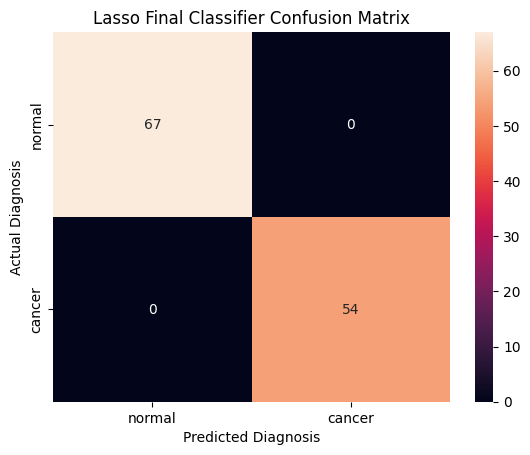

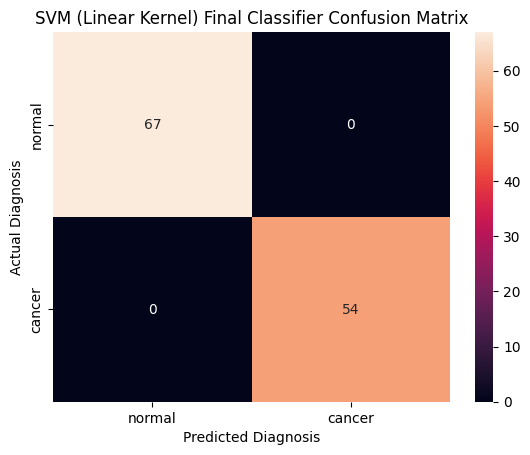

<Figure size 640x480 with 0 Axes>

In [153]:
def plot_confusion_matrix(truth, pred, title: str):
    ax = plt.subplot()

    cmatrix = sns.heatmap(confusion_matrix(truth, pred), annot=True, fmt='d')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(CLASSNAMES.keys())
    ax.yaxis.set_ticklabels(CLASSNAMES.keys())
    ax.set_xlabel("Predicted Diagnosis")
    ax.set_ylabel("Actual Diagnosis")
    cmatrix.plot()
    plt.show()

    # plt.savefig("figures/b_"+title.replace(" ", "_"))
    
    plt.clf()

plot_confusion_matrix(
    Y['label'], 
    lassoFinal.predict(X),
    "Lasso Final Classifier Confusion Matrix")

plot_confusion_matrix(
    Y['label'], 
    svmFinal.predict(X),
    "SVM (Linear Kernel) Final Classifier Confusion Matrix")

## b. CV-based Error Rate Estimates

In [185]:
lasso.set_params(C=lassoGrid.best_params_['C'])
pred_lasso_cv = cross_val_predict(lasso, X, Y.to_numpy().ravel(), cv=kfolds, n_jobs=-1)
pred_svm_cv = cross_val_predict(lasso, X, Y.to_numpy().ravel(), cv=kfolds, n_jobs=-1)
pred_lasso_final = lassoFinal.predict(X)
pred_svm_final = svmFinal.predict(X)

In [186]:
print(classification_report(Y, pred_lasso_cv))
print(classification_report(Y, pred_lasso_final))

              precision    recall  f1-score   support

      cancer       0.79      0.63      0.70        67
      normal       0.63      0.80      0.70        54

    accuracy                           0.70       121
   macro avg       0.71      0.71      0.70       121
weighted avg       0.72      0.70      0.70       121

              precision    recall  f1-score   support

      cancer       1.00      1.00      1.00        67
      normal       1.00      1.00      1.00        54

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



## c. Finding The Optimal Value of λ

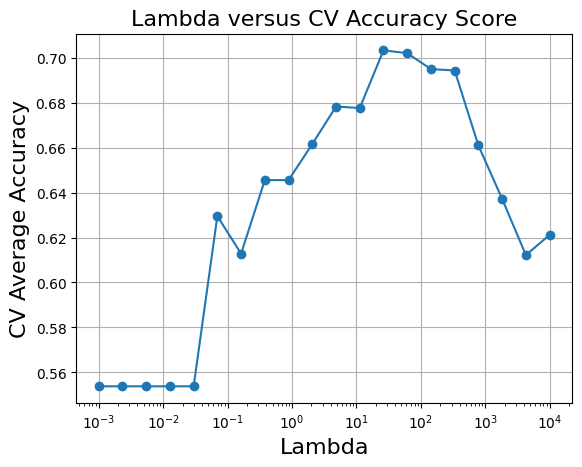

In [163]:
# adapted from: https://stackoverflow.com/a/43645640
def plot_grid_search(cv_results, search_space):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    ax.plot(search_space, scores_mean, '-o')

    ax.set_title("Lambda versus CV Accuracy Score", fontsize=16)
    ax.set_xlabel("Lambda", fontsize=16)
    ax.set_ylabel('CV Average Accuracy', fontsize=16)
    ax.set_xscale('log')
    ax.grid('on')

# Calling Method 
plot_grid_search(lassoGrid.cv_results_, search_space) 

# 6. Results Comparison

# Experiments